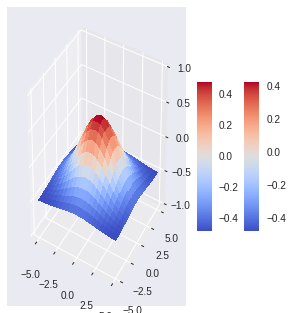

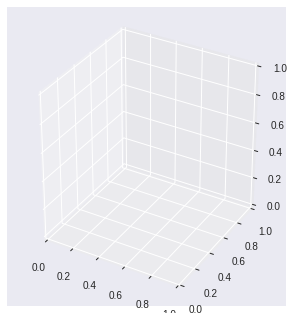

In [4]:
## 3.3 Function approximation

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax
from matplotlib import cm
from random import * 

from copy import deepcopy

step = 1 # or 1 for subsampling

def gaussFunc(x,y):
  return np.exp(-1*(x**2+y**2)/10) - 0.5


x_data = np.arange(-5,5.5,step)
y_data = np.arange(-5,5.5,step)
z=gaussFunc(x_data,y_data)
datatest = [x_data,y_data]

X, Y = np.meshgrid(x_data, y_data, sparse=False, indexing='ij')

Z = gaussFunc(X,Y)

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')


surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

targets = [gaussFunc(x_data,y_data)]
targets = np.transpose(targets)

dim = np.shape(X)[0]
Xre = X.reshape(dim*dim,1)
Yre = Y.reshape(dim*dim,1)
Z = Z.reshape(dim*dim,1)

data = np.concatenate((Xre,Yre),axis=1)



x_data2 = np.arange(-5,5.5,0.5)
y_data2 = np.arange(-5,5.5,0.5)
z2=gaussFunc(x_data2,y_data2)
datatest2 = [x_data2,y_data2]

X2, Y2 = np.meshgrid(x_data2, y_data2, sparse=False, indexing='ij')

Z2 = gaussFunc(X2,Y2)

fig2 = plt.figure(figsize=plt.figaspect(0.5))

ax2 = fig2.add_subplot(1, 2, 1, projection='3d')


surf2 = ax.plot_surface(X2, Y2, Z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf2, shrink=0.5, aspect=10)

targets2 = [gaussFunc(x_data2,y_data2)]
targets2 = np.transpose(targets2)

dim2 = np.shape(X2)[0]
Xre2 = X2.reshape(dim2*dim2,1)
Yre2 = Y2.reshape(dim2*dim2,1)
Z2 = Z2.reshape(dim2*dim2,1)

data2 = np.concatenate((Xre2,Yre2),axis=1)




#print(len(data))
#print(np.shape(datatest))
#print(np.shape(data))
#print(z)
#print(np.transpose([z]))

#print(np.array(Z))
#Y
# Test with n = 1 up to n = 25. 
# Vary the number of nodes in the hidden layer and try to observe any trends. 
# What happens when you have very few (less than 5) or very many (more than 20) hidden nodes? Can you explain your observations?

(11, 11)
(11, 11)


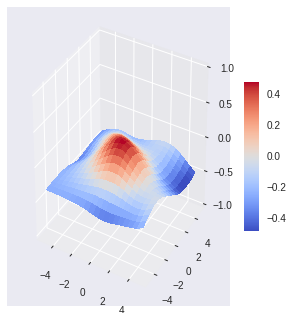

Text(0.5,0,'Epochs')

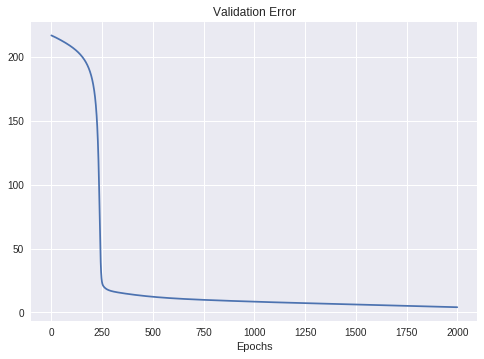

In [44]:
### NEW VERSION, WORKS
epoch = 2000
n_hiddenNodes = 28;
eta=0.001;

#Restructuring data
transData =  np.transpose(datatest)

dataInput = transData  
labels = np.transpose([z])

dataInput = data
labels = np.array(Z)#np.transpose([Z])

# There are (L+1) X M weights between input and hidden
# There are (M+1) X N weights between hidden and output
L = np.shape(dataInput)[1]
M = n_hiddenNodes
N = np.shape(labels)[1]

weights_hid = np.random.uniform(low=0, high=1, size=((L+1), n_hiddenNodes)) # [3,2] (x,y,bias)
weights_out = np.random.uniform(low=0, high=1, size=((n_hiddenNodes+1),N))  # [3,1]

dataInput = np.concatenate((dataInput,-np.ones((len(dataInput),1))),axis=1)  # [100,3]

#Restructuring TEST 
transData2 =  np.transpose(datatest2)

dataInput2 = transData2  
labels2 = np.transpose([z2])

dataInput2 = data2
labels2 = np.array(Z2)#np.transpose([Z])

dataInput2 = np.concatenate((dataInput2,-np.ones((len(dataInput2),1))),axis=1)  # [100,3]

hidden = []
hidden2 = []
output = []
output_signal = []
hidden_n = []
output_n = []
error_storage = [] #np.zeros(epoch)
error_storage_test = np.zeros(epoch)
difference = []
error_validation_storage =[]

plotWeights = []

def activationArr(arr):
  return np.where(arr>0,1,0) 
# Defining the sigmoid function
def sigmoid(value):
  return (2/(1.0+np.exp(-1*value)))-1

# Defining function for forward pass
def feedForwardValue(inp):
  #print("FFD")
  hidden = np.dot(inp, weights_hid);                                            # [100,2]        [100,3] X [3,2] 
  hidden = sigmoid(hidden)                                                      # [100,2]                           (100 that fired or not in 2 hidden neuron)
  hidden2 = np.concatenate((hidden,-np.ones((np.shape(inp)[0],1))),axis=1)      #[100,3] # Add the bias column

  output = np.dot(hidden2,weights_out)                                          # [100,1]        [100,3] X [3,1]    (100 that fired or not in 1 output neuron)
  #print(np.shape(output))
  
  output_signal =  sigmoid(output)                                              # [100,1]
  
  return hidden2, output_signal;  # [100,3],[100,1]


plt.figure(1)
#Calling forward pass
for i in range(epoch): 
  
  hidden_n,output_n = feedForwardValue(dataInput)                               # [100,3],[100,1]
  error = np.sum((output_n-labels)**2)*(0.5) 
  
  _, output_validation = feedForwardValue(dataInput2)
  

  error_validation  =  np.sum((output_validation-labels2)**2)*0.5
  
  # Calculating deltao  
  deltao = np.multiply(output_n-labels,(1+output_n)*(1-output_n)*0.5)                   # [100,1]        [100,1] * [100,1]
  
  # Calculating deltah
  hidden_n_subtract = 1 - hidden_n                                              # [100,3]
  derivative =   0.5*np.multiply(1 + hidden_n,hidden_n_subtract)                        # [100,3]        [100,3] * [100,3]
  deltah = np.multiply(derivative,np.dot(deltao,np.transpose(weights_out)))     # [100,3]        [100,3] * [100,3]

  # Removing the bias-column
  
  deltah_biasRemove = np.delete(deltah, (2), axis=1)                            # [100,2]        Get rid of last column
  
  # Weight updates
  
  weights_hid -= eta*np.matmul(np.transpose(dataInput), deltah_biasRemove)      # [3,2]          [3,100] X [100,2]
  weights_out -= eta*np.matmul(np.transpose(hidden_n),deltao)                   # [3,1]          [3,100] X [100,1]
  error_storage.append(error)
  error_validation_storage.append(error_validation)
  #plt.title('Epoch ' + str(e) + ', Batch ' + str(i))

  
 #PLOt 
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')

plotz = output_validation.reshape(dim2,dim2)

print(np.shape(X))
print(np.shape(Y))


surf = ax.plot_surface(X2, Y2, plotz, rstride=1, cstride=1, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf2, shrink=0.5, aspect=10)


plt.show()  
  
plt.figure(2)
plt.plot(error_validation_storage)
plt.title('Validation Error')
plt.xlabel('Epochs')